In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#Reading in CSV
df = pd.read_csv('manhattan.csv')

In [3]:
#Checking out file
print(df.head())

   rental_id   rent  bedrooms  bathrooms  size_sqft  min_to_subway  floor  \
0       1545   2550       0.0          1        480              9    2.0   
1       2472  11500       2.0          2       2000              4    1.0   
2       2919   4500       1.0          1        916              2   51.0   
3       2790   4795       1.0          1        975              3    8.0   
4       3946  17500       2.0          2       4800              3    4.0   

   building_age_yrs  no_fee  has_roofdeck  has_washer_dryer  has_doorman  \
0                17       1             1                 0            0   
1                96       0             0                 0            0   
2                29       0             1                 0            1   
3                31       0             0                 0            1   
4               136       0             0                 0            1   

   has_elevator  has_dishwasher  has_patio  has_gym       neighborhood  \
0     

In [4]:
#Defining x & y parameters
x = df[['bedrooms',
'bathrooms',
'size_sqft',
'min_to_subway',
'floor',
'building_age_yrs',
'no_fee',
'has_roofdeck',
'has_washer_dryer',
'has_doorman',
'has_elevator',
'has_dishwasher',
'has_patio',
'has_gym']]

y = df['rent']

In [5]:
#Creating training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 6)

In [6]:
#Checking shapes
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2831, 14) (708, 14) (2831,) (708,)


In [7]:
#Creating MLR
mlr = LinearRegression()

#Training the model
mlr.fit(x_train, y_train)

LinearRegression()

In [8]:
#Predicitng y values (rent price)
y_predict = mlr.predict(x_test)

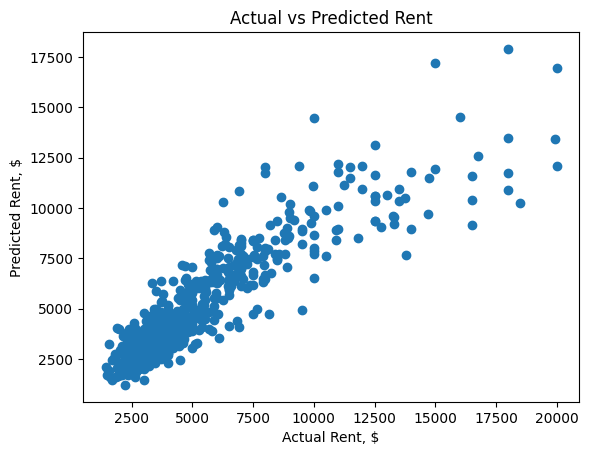

In [9]:
#Visualizing the actual rent price vs predicted
plt.scatter(y_test, y_predict)
plt.xlabel('Actual Rent, $')
plt.ylabel('Predicted Rent, $')
plt.title('Actual vs Predicted Rent')
plt.show()


In [10]:
#Assessing coefficients
print(mlr.coef_)

[-302.73009383 1199.3859951     4.79976742  -24.28993151   24.19824177
   -7.58272473 -140.90664773   48.85017415  191.4257324  -151.11453388
   89.408889    -57.89714551  -19.31948556  -38.92369828]


In [11]:
#Assessing correlations between x variables and rent
x_variables = ['bedrooms',
'bathrooms',
'size_sqft',
'min_to_subway',
'floor',
'building_age_yrs',
'no_fee',
'has_roofdeck',
'has_washer_dryer',
'has_doorman',
'has_elevator',
'has_dishwasher',
'has_patio',
'has_gym']

y_variable = ['rent']

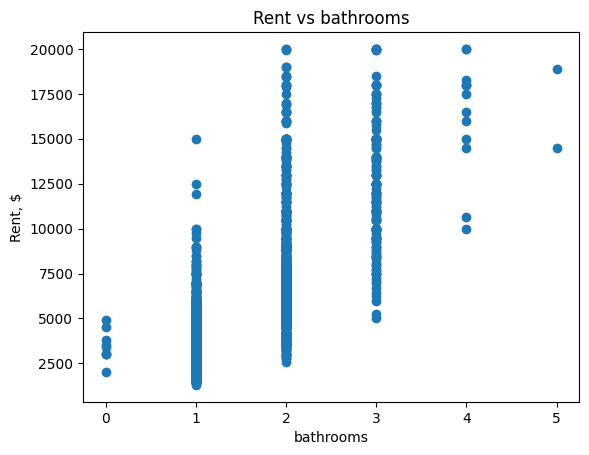

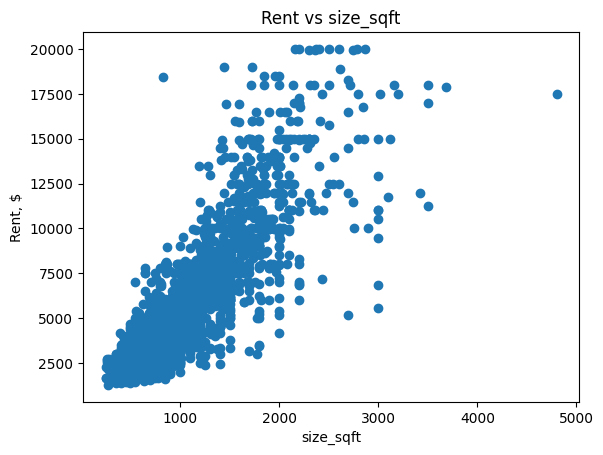

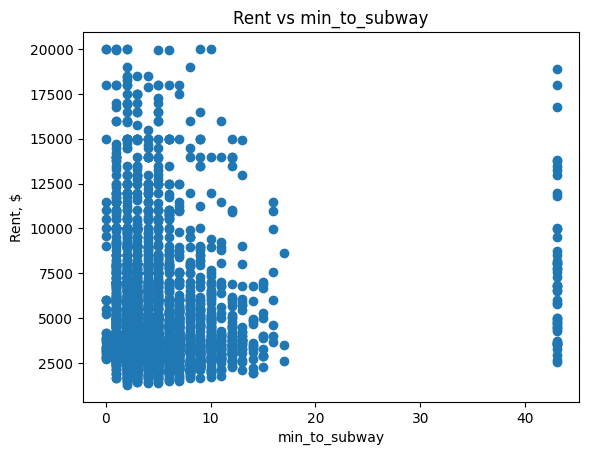

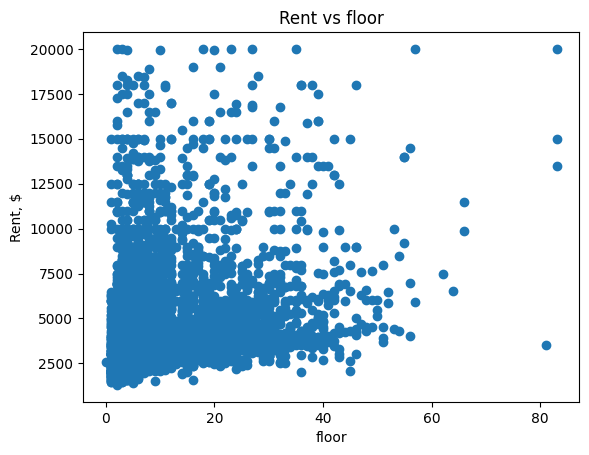

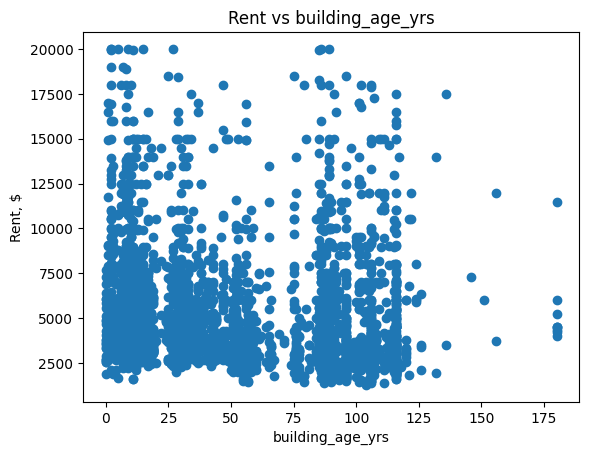

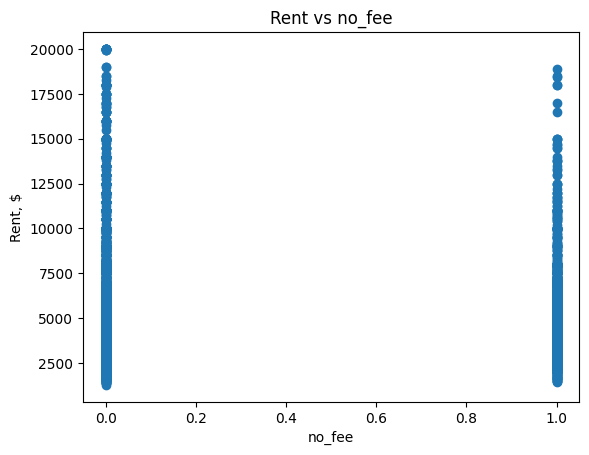

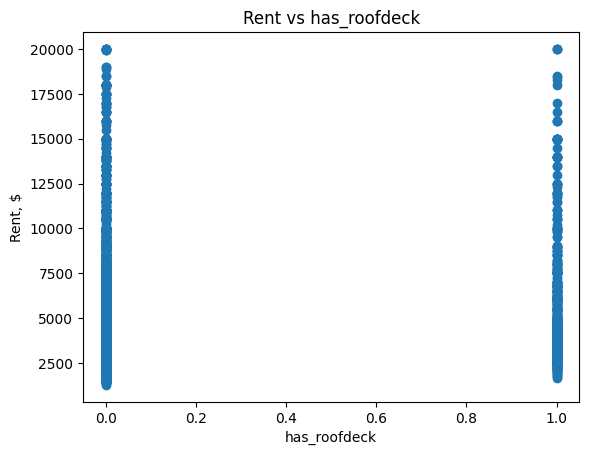

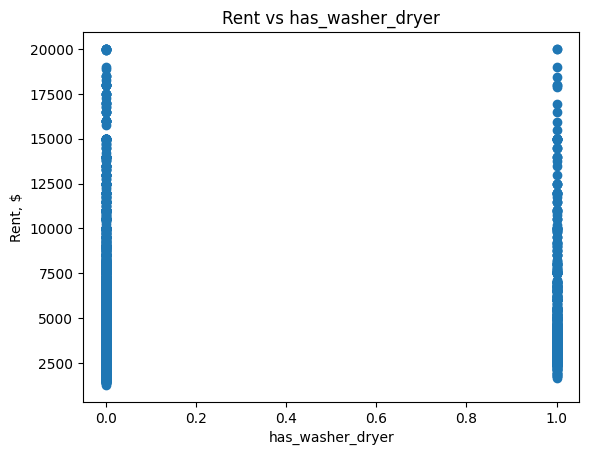

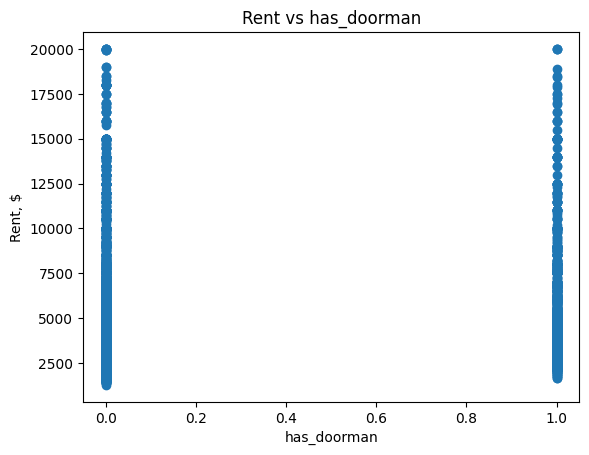

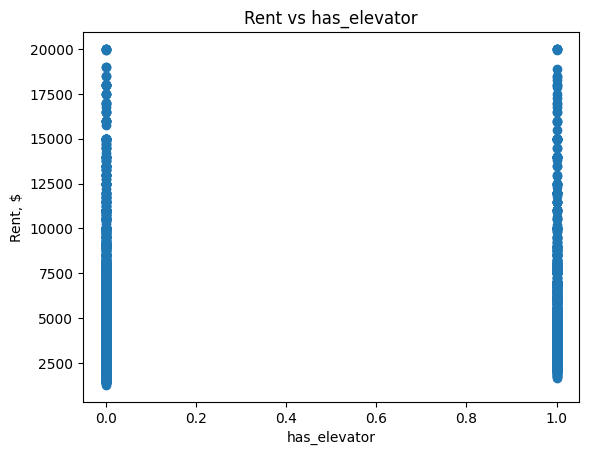

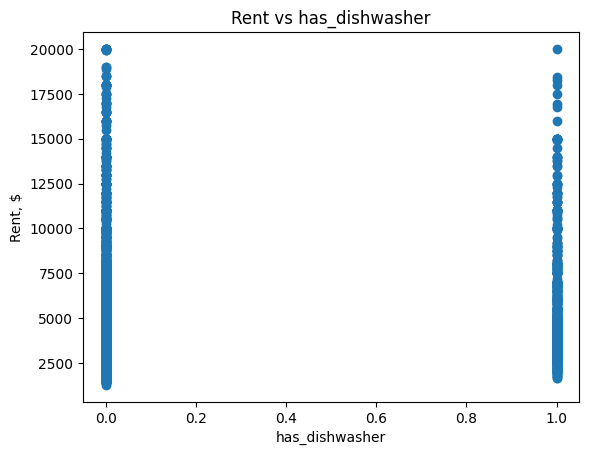

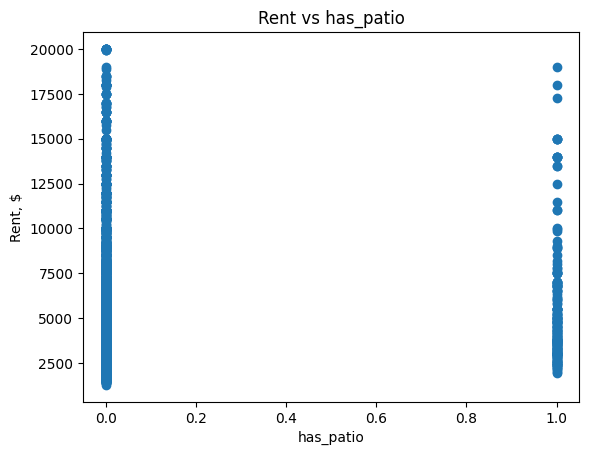

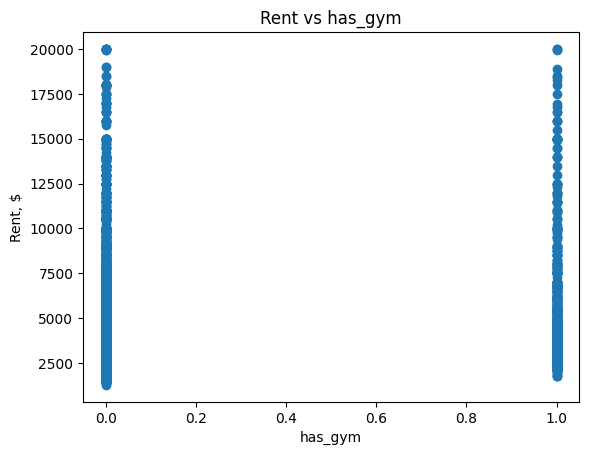

In [12]:
for col in x_variables[1:]:
    plt.scatter(df[col], df[y_variable])
    plt.xlabel(col)
    plt.ylabel('Rent, $')
    plt.title('Rent vs ' + str(col))
    plt.show()

In [13]:
#The strongest positive correlations are visually seen between Rent vs Square Footage & Rent vs Floor #. 
#There also seems to be a relationship between Rent adn number of bathrooms.
#We need to keep in mind some variables are rated on a scale of 0 (False) and 1 (True) so some features are not comparable to rent with linear regression.

In [14]:
#Let's take a look at the model's accuracy using residual analysis where y is the actual rent and y^ is the predicted rent

In [15]:
mean_sq_error_train = mlr.score(x_train, y_train)
print('Training Score: ' + str(mean_sq_error_train))

Training Score: 0.7725460559817883


In [16]:
mean_sq_error_test = mlr.score(x_test, y_test)
print('Testing score: ' + str(mean_sq_error_test))

Testing score: 0.8050371975357623


In [17]:
#R^2 values above 0.7 are generally considered acceptable. Both the trainging and testing sets scored above this.
#Let's see if we can improve on this value.

In [18]:
#Begin Rebuilding Model
#Taking a look at the model coefficients again
print(mlr.coef_)
print(x_variables)

[-302.73009383 1199.3859951     4.79976742  -24.28993151   24.19824177
   -7.58272473 -140.90664773   48.85017415  191.4257324  -151.11453388
   89.408889    -57.89714551  -19.31948556  -38.92369828]
['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']


In [19]:
#Remove variables with low correlations. In this case, I'm going to remove anything >150 & <-150
new_x = []
for i in range(len(x_variables)):
    if (float(mlr.coef_[i]) > 150) | (float(mlr.coef_[i]) < -150):
        new_x.append(x_variables[i])
    print(new_x)

['bedrooms']
['bedrooms', 'bathrooms']
['bedrooms', 'bathrooms']
['bedrooms', 'bathrooms']
['bedrooms', 'bathrooms']
['bedrooms', 'bathrooms']
['bedrooms', 'bathrooms']
['bedrooms', 'bathrooms']
['bedrooms', 'bathrooms', 'has_washer_dryer']
['bedrooms', 'bathrooms', 'has_washer_dryer', 'has_doorman']
['bedrooms', 'bathrooms', 'has_washer_dryer', 'has_doorman']
['bedrooms', 'bathrooms', 'has_washer_dryer', 'has_doorman']
['bedrooms', 'bathrooms', 'has_washer_dryer', 'has_doorman']
['bedrooms', 'bathrooms', 'has_washer_dryer', 'has_doorman']


In [20]:
#Creating new dataframe of the newly selected columns
new_x_df = df[new_x]

In [21]:
#Creating traingin and testing set
x_train2, x_test2, y_train2, y_test2 = train_test_split(new_x_df, y, train_size = 0.8, test_size = 0.2, random_state=6)

In [22]:
#Creating new MLR model
mlr2 = LinearRegression()

In [23]:
#Training Model
mlr2.fit(x_train2, y_train2)

LinearRegression()

In [24]:
#Predicting y values
y_predict2 = mlr2.predict(x_test2)

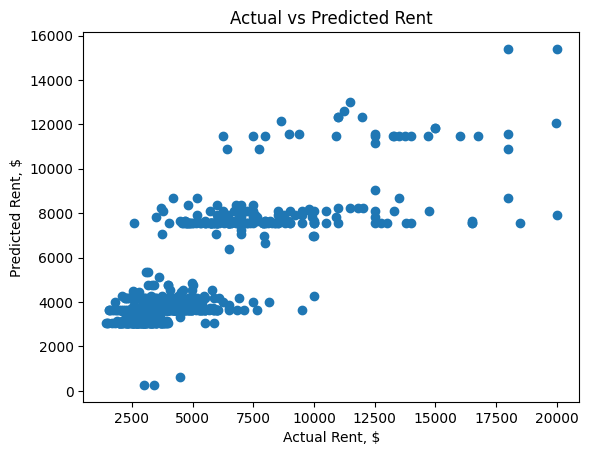

In [25]:
#Visualizing the actual rent price vs predicted
plt.scatter(y_test2, y_predict2)
plt.xlabel('Actual Rent, $')
plt.ylabel('Predicted Rent, $')
plt.title('Actual vs Predicted Rent')
plt.show()


In [26]:
#Checking training set
mean_sq_error_train2 = mlr2.score(x_train2, y_train2)
print('Training Score: ' + str(mean_sq_error_train2))

Training Score: 0.6023300961927595


In [27]:
mean_sq_error_test2 = mlr2.score(x_test2, y_test2)
print('Testing score: ' + str(mean_sq_error_test2))

Testing score: 0.631729055182016


In [28]:
#Our model got worse! We need more variables to be included.
#Let's run one more model looking at correlation scores of >10 & <-10
#Remove variables with low correlations.
new_x2 = []
for i in range(len(x_variables)):
    if (float(mlr.coef_[i]) > 10) | (float(mlr.coef_[i]) < -10):
        new_x2.append(x_variables[i])
    print(new_x2)

['bedrooms']
['bedrooms', 'bathrooms']
['bedrooms', 'bathrooms']
['bedrooms', 'bathrooms', 'min_to_subway']
['bedrooms', 'bathrooms', 'min_to_subway', 'floor']
['bedrooms', 'bathrooms', 'min_to_subway', 'floor']
['bedrooms', 'bathrooms', 'min_to_subway', 'floor', 'no_fee']
['bedrooms', 'bathrooms', 'min_to_subway', 'floor', 'no_fee', 'has_roofdeck']
['bedrooms', 'bathrooms', 'min_to_subway', 'floor', 'no_fee', 'has_roofdeck', 'has_washer_dryer']
['bedrooms', 'bathrooms', 'min_to_subway', 'floor', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman']
['bedrooms', 'bathrooms', 'min_to_subway', 'floor', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator']
['bedrooms', 'bathrooms', 'min_to_subway', 'floor', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher']
['bedrooms', 'bathrooms', 'min_to_subway', 'floor', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio']
[

In [29]:
new_x_df2 = df[new_x2]

In [30]:
#Creating training and testing sets
x_train3, x_test3, y_train3, y_test3 = train_test_split(new_x_df2, y, train_size = 0.8, test_size = 0.2, random_state=6)

In [31]:
#Create new MLR model
mlr3 = LinearRegression()

In [32]:
#Training Model
mlr3.fit(x_train3, y_train3)

LinearRegression()

In [33]:
#Predicting Y values
y_predict3 = mlr3.predict(x_test3)

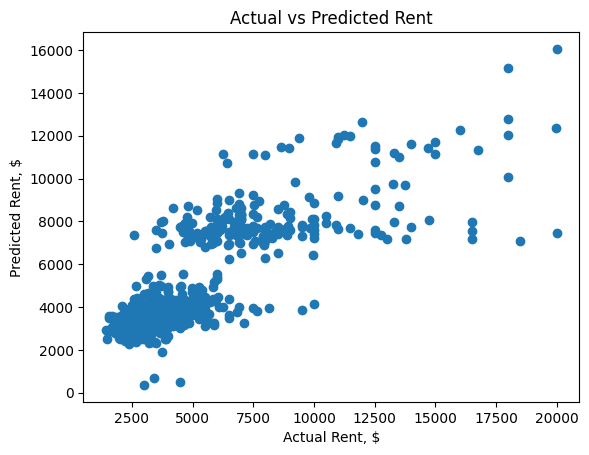

In [34]:
#Plotting Predicted y vs Actual y
#Visualizing the actual rent price vs predicted
plt.scatter(y_test3, y_predict3)
plt.xlabel('Actual Rent, $')
plt.ylabel('Predicted Rent, $')
plt.title('Actual vs Predicted Rent')
plt.show()

In [35]:
#Checking training set
mean_sq_error_train3 = mlr3.score(x_train3, y_train3)
print('Training Score: ' + str(mean_sq_error_train3))

mean_sq_error_test3 = mlr3.score(x_test3, y_test3)
print('Testing score: ' + str(mean_sq_error_test3))

Training Score: 0.6262190148259476
Testing score: 0.6395410920562391


In [36]:
mlr4 = LinearRegression()

In [37]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(x, y, train_size = 0.8, test_size = 0.2)

In [38]:
mlr4.fit(x_train4, y_train4)

LinearRegression()

In [39]:
y_predict4 = mlr.predict(x_test4)

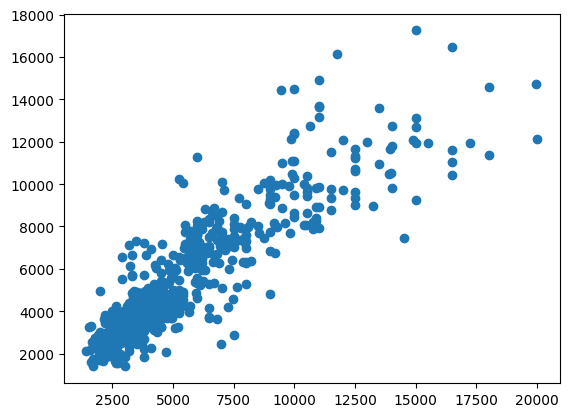

In [40]:
plt.scatter(y_test4, y_predict4)
plt.show()

In [41]:
#Checking training set
mean_sq_error_train4 = mlr4.score(x_train4, y_train4)
print('Training Score: ' + str(mean_sq_error_train4))

mean_sq_error_test4 = mlr4.score(x_test4, y_test4)
print('Testing score: ' + str(mean_sq_error_test4))

Training Score: 0.7753691715969915
Testing score: 0.7935517007779473
